In [13]:
from ipynb.fs.full.TARGET_Analysis_Functions import *
from scipy.stats import chi2_contingency

# Diagnosis age and IFITM3 expression analysis

### Compare IFITM3 expression between age groups

<18mo v.s. >=18mo: t-test independent samples, P_val=2.787e-01 stat=-1.086e+00


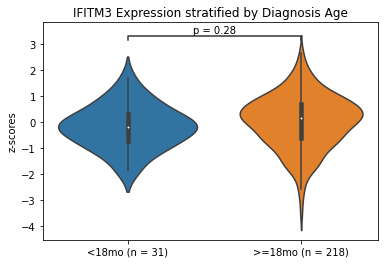

<18mo: median = -0.2012, mean = -0.18273548387096772, 95% CI = (-0.473718798867716, 0.10824783112578057)
>=18mo: median = 0.14855000000000002, mean = 0.025989449541284407, 95% CI = (-0.10987616309170142, 0.16185506217427023)


In [5]:
Age_groups = stratifyNumericalPatientData('Diagnosis Age (days)', 540) #540 days ~ 18 months
compareExpression2('IFITM3', Age_groups,'Diagnosis Age',['<18mo','>=18mo'],'t-test_ind')

### Compare prevalence of age groups in samples stratified by IFITM3 expression

In [11]:
labels = ['low','intermediate','high']
IFITM3_groups = stratifyDataOnGeneExpression2('IFITM3',-0.5,0.5)
for i in range(len(IFITM3_groups)):
    young_count = 0
    for sample in IFITM3_groups[i]:
        if(sample in list(Age_groups[0])):
            young_count += 1
    young_prop = young_count/len(IFITM3_groups[i])
    print("Number of <18mo patients in " + labels[i] + " IFITM3 expression group: " + str(young_count) + "/" + str(len(IFITM3_groups[i])))
    print("Proportion of <18mo patients in " + labels[i] + " IFITM3 expression group: " + str(young_prop))
    
    
    


Number of <18mo patients in low IFITM3 expression group: 9/73
Proportion of <18mo patients in low IFITM3 expression group: 0.1232876712328767
Number of <18mo patients in intermediate IFITM3 expression group: 16/100
Proportion of <18mo patients in intermediate IFITM3 expression group: 0.16
Number of <18mo patients in high IFITM3 expression group: 6/76
Proportion of <18mo patients in high IFITM3 expression group: 0.07894736842105263


In [14]:
#Chi-Squared Test comparing all three groups
contingency_table = [[73-9,100-16,76-6],[9,16,6]]
stat, p, dof, expected = chi2_contingency(contingency_table)
print("p-value from Chi-Squared Test: " + str(p))

p-value from Chi-Squared Test: 0.2719821855259705


### Compare EFS in >=18 mo samples stratified by IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=3.648e-01 stat=-9.091e-01
Intermediate v.s. High: t-test independent samples, P_val=1.734e-01 stat=1.368e+00
Low v.s. High: t-test independent samples, P_val=7.141e-01 stat=3.672e-01


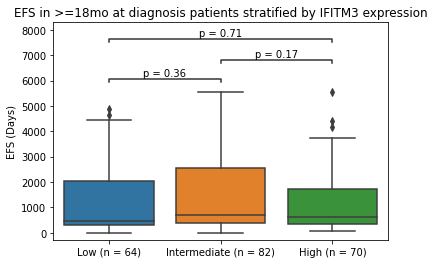

Low: median = 473.0, mean = 1265.375, 95% CI = (914.0414830214582, 1616.7085169785419)
Intermediate: median = 688.5, mean = 1489.8536585365853, 95% CI = (1161.8449110106692, 1817.8624060625013)
High: median = 639.0, mean = 1181.1857142857143, 95% CI = (895.6947741348123, 1466.6766544366164)


In [15]:
#Stratify samples based on diagnosis age
Age_groups = stratifyNumericalPatientData('Diagnosis Age (days)', 540) #540 days ~ 18 months

#Find z-scores for >=18mo samples
old_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(Age_groups[1]).intersection(z_scores.columns))
old_z_scores = z_scores[old_columns]

#Obtain the IFITM3 z-scores in >=18mo samples
IFITM3_old_z_scores = old_z_scores.loc[old_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_old_samples = IFITM3_old_z_scores.loc[IFITM3_old_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_old_samples = IFITM3_old_z_scores.loc[IFITM3_old_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_old_samples = intermediate_IFITM3_old_samples.loc[intermediate_IFITM3_old_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_old_samples = IFITM3_old_z_scores.loc[IFITM3_old_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_old_samples, intermediate_IFITM3_old_samples, high_IFITM3_old_samples]
compareEFS2(data,'EFS in >=18mo at diagnosis patients stratified by IFITM3 expression',['Low','Intermediate','High'],'t-test_ind')
       




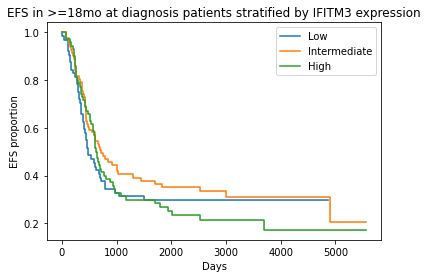

Log Rank Test between Low and Intermediate


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.99 0.32      1.64

Log Rank Test between Low and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.01 0.92      0.11

Log Rank Test between Intermediate and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.41 0.24      2.09

In [16]:
kaplanmeierEFS2(data,'EFS in >=18mo at diagnosis patients stratified by IFITM3 expression',['Low','Intermediate','High'])




Remaining samples v.s. High IFITM3 samples: t-test independent samples, P_val=3.030e-01 stat=1.033e+00


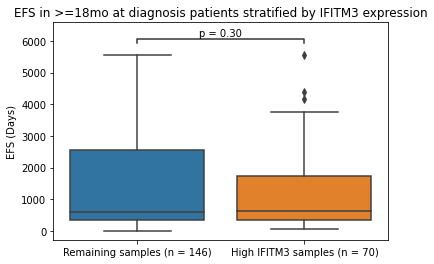

Remaining samples: median = 608.0, mean = 1391.4520547945206, 95% CI = (1151.4650475210292, 1631.439062068012)
High IFITM3 samples: median = 639.0, mean = 1181.1857142857143, 95% CI = (895.6947741348123, 1466.6766544366164)


In [19]:
not_high_IFITM3_old_samples = IFITM3_old_z_scores.loc[IFITM3_old_z_scores.iloc[:,0] < 0.5].index
data = [not_high_IFITM3_old_samples,high_IFITM3_old_samples]
compareEFS2(data,'EFS in >=18mo at diagnosis patients stratified by IFITM3 expression',['Remaining samples','High IFITM3 samples'],'t-test_ind')



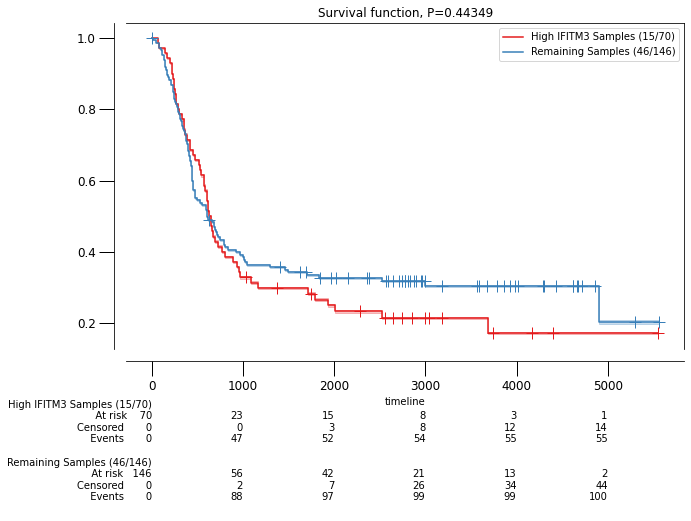

In [20]:
kaplanmeierEFS(data,'Remaining Samples','High IFITM3 Samples')

### Compare EFS in <18 mo samples stratified by IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=4.638e-02 stat=-2.105e+00
Intermediate v.s. High: t-test independent samples, P_val=3.233e-02 stat=2.300e+00
Low v.s. High: t-test independent samples, P_val=7.445e-01 stat=3.329e-01


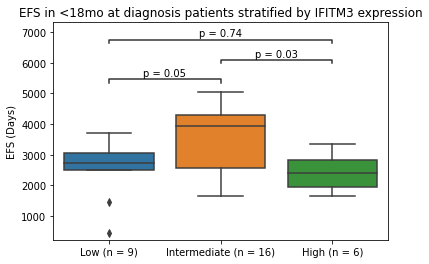

Low: median = 2744.0, mean = 2586.3333333333335, 95% CI = (1904.2931672051072, 3268.3734994615597)
Intermediate: median = 3929.5, mean = 3536.125, 95% CI = (2995.783010668838, 4076.466989331162)
High: median = 2396.0, mean = 2426.5, 95% CI = (1912.0059696896178, 2940.994030310382)


In [17]:
#Stratify samples based on diagnosis age
Age_groups = stratifyNumericalPatientData('Diagnosis Age (days)', 540) #540 days ~ 18 months

#Find z-scores for <18mo samples
young_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(Age_groups[0]).intersection(z_scores.columns))
young_z_scores = z_scores[young_columns]

#Obtain the IFITM3 z-scores in <18mo samples
IFITM3_young_z_scores = young_z_scores.loc[young_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_young_samples = IFITM3_young_z_scores.loc[IFITM3_young_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_young_samples = IFITM3_young_z_scores.loc[IFITM3_young_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_young_samples = intermediate_IFITM3_young_samples.loc[intermediate_IFITM3_young_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_young_samples = IFITM3_young_z_scores.loc[IFITM3_young_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_young_samples, intermediate_IFITM3_young_samples, high_IFITM3_young_samples]
compareEFS2(data,'EFS in <18mo at diagnosis patients stratified by IFITM3 expression',['Low','Intermediate','High'],'t-test_ind')
       




Remaining samples v.s. High IFITM3 samples: t-test independent samples, P_val=1.309e-01 stat=1.555e+00


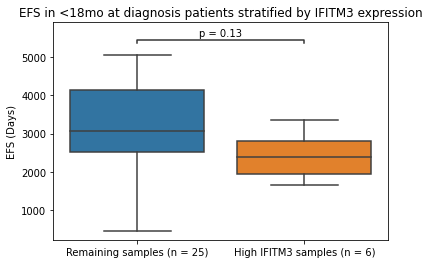

Remaining samples: median = 3065.0, mean = 3194.2, 95% CI = (2740.463243676697, 3647.9367563233027)
High IFITM3 samples: median = 2396.0, mean = 2426.5, 95% CI = (1912.0059696896178, 2940.994030310382)


In [21]:
not_high_IFITM3_young_samples = IFITM3_young_z_scores.loc[IFITM3_young_z_scores.iloc[:,0] < 0.5].index
data = [not_high_IFITM3_young_samples,high_IFITM3_young_samples]
compareEFS2(data,'EFS in <18mo at diagnosis patients stratified by IFITM3 expression',['Remaining samples','High IFITM3 samples'],'t-test_ind')

